<a href="https://colab.research.google.com/github/gilcu2/mlpython/blob/master/multiclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 207us/step - loss: 2.5537 - acc: 0.4920 - val_loss: 1.7077 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.4048 - acc: 0.7171 - val_loss: 1.3030 - val_acc: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0584 - acc: 0.7848 - val_loss: 1.1720 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8364 - acc: 0.8272 - val_loss: 1.0467 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6682 - acc: 0.8621 - val_loss: 0.9796 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5386 - acc: 0.8875 - val_loss: 0.9289 - val_acc: 0.8140
Epoch 7/20
7982/7982 [============

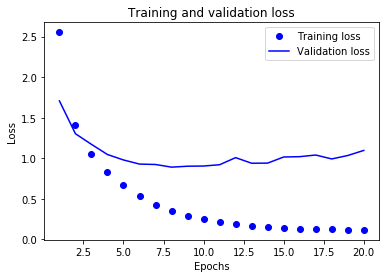

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

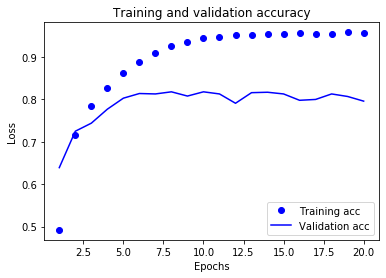

In [14]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 159us/step - loss: 2.6360 - acc: 0.5293 - val_loss: 1.7241 - val_acc: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.4117 - acc: 0.7091 - val_loss: 1.3016 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.0480 - acc: 0.7831 - val_loss: 1.1368 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.8283 - acc: 0.8240 - val_loss: 1.0541 - val_acc: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.6695 - acc: 0.8559 - val_loss: 0.9687 - val_acc: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.5365 - acc: 0.8857 - val_loss: 0.9425 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.4382 - acc: 0.9080 - val_loss: 0.9105 - val_acc: 0.8080
Epoch 8

[0.9767838322681077, 0.7974176313446126]